# 数据集可视化

这是个markdown，所以也是可以写公式的

顾名思义，这是个可视化测试数据的东西，那么先来一点import

In [2]:
import keras  # 我的版本没有对得很好，有future warning
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

classification = 'airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'

把数据给拿进来，如果没下过数据的话可能要先下载一下：

In [3]:
print("== LOADING DATA... ==")
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("== Done... ==")

== LOADING DATA... ==
== Done... ==


In [4]:
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


定义一个函数，根据下标来显示图像：

In [5]:
def display_image(index, set='train'):
    img = x_train[index] if set=='train' else x_test[index]
    label = y_train[index] if set=='train' else y_test[index]
    return img, classification[label[0]]

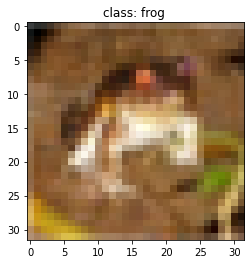

In [6]:
img, label_name = display_image(index=0, set='train') #只需要修改这里

plt.imshow(img)
plt.title('class: {} '.format(label_name))

plt.show()

看起来非常的抽象，不过确实非常抽象。

# 加载模型
接下来要加载我们的模型了，有那么一些激动.

首先来看一看我们的模型：

In [7]:
model = keras.models.load_model('./resnet_20_cifar10.h5')
# model.summary()

再定义一下预测函数：

In [8]:
def predict_image(img):
    # === 验证部分 ===
    # 预处理
    img_predict = img.astype('float32').reshape([1,32,32,3])
    mean = [125.307, 122.95, 113.865]
    std  = [62.9932, 62.0887, 66.7048]
    for i in range(3):
        img_predict[:,:,:,i] = (img_predict[:,:,:,i] - mean[i]) / std[i]

    # 预测
    return model.predict(img_predict)

好，很好，非常好，那么接下来在数据集中拿一张图片来跑一跑：

你将要测试如下图片：


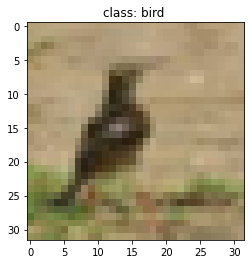

In [12]:
img, label_name = display_image(index=9525, set='test') #只需要修改这里

print("你将要测试如下图片：")
plt.imshow(img)
plt.title('class: {} '.format(label_name))

plt.show()

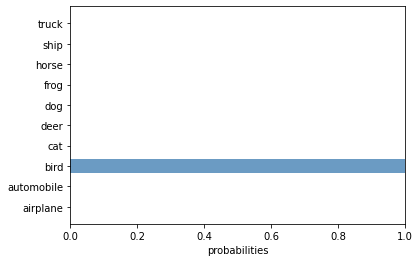

[8.4780655e-12 4.4761533e-13 9.9999523e-01 2.2064323e-06 2.4997646e-06
 2.5084441e-09 6.9211864e-10 4.5516625e-11 7.4475530e-12 3.1924317e-11]


In [13]:
# 预测
predicion = predict_image(img).reshape([10,])

# 打印结果
plt.barh(range(10), predicion, height=0.7, color='steelblue', alpha=0.8)      # 从下往上画
plt.yticks(range(10), classification)
plt.xlabel("probabilities")
plt.xlim(0,1)
plt.show()

print(predicion)

# 加载自己的图片

因为我还没写，所以我们需要恰好$32\times32$像素的图片：

(32, 32, 3)
你将要测试如下图片：


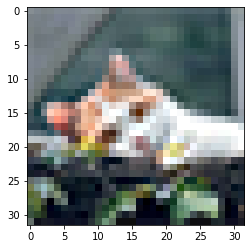

In [14]:
image= imread("./pictures/cat-1.png")
image= image[:,:,0:3]
print(image.shape)
assert(image.shape == (32,32,3))


print("你将要测试如下图片：")
plt.imshow(image)

plt.show()

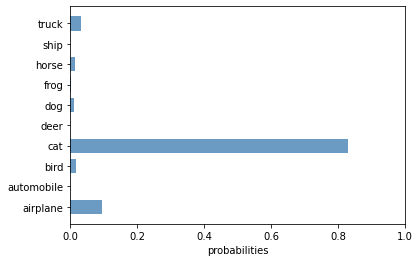

[9.5264152e-02 2.0516089e-04 1.7369837e-02 8.2951665e-01 2.8085659e-04
 1.1678206e-02 2.2161498e-03 1.2525177e-02 1.6980138e-04 3.0773979e-02]


In [15]:
# 预测
predicion = predict_image(image * 255).reshape([10,])

# 打印结果
plt.barh(range(10), predicion, height=0.7, color='steelblue', alpha=0.8)      # 从下往上画
plt.yticks(range(10), classification)
plt.xlabel("probabilities")
plt.xlim(0,1)
plt.show()

print(predicion)

妙哇（手动滑稽）